In [1]:
import PIL
print(PIL.__version__)

9.0.1


In [2]:
'''['BytesIO',
 'FreeTypeFont',
 'Image',
 'ImageFont',
 'IntEnum',
 'Layout',
 'MAX_STRING_LENGTH',
 'TransposedFont',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_string_length_check',
 'base64',
 'core',
 'is_directory',
 'is_path',
 'load',
 'load_default',
 'load_path',
 'os',
 'sys',
 'truetype',
 'warnings']
 '''

"['BytesIO',\n 'FreeTypeFont',\n 'Image',\n 'ImageFont',\n 'IntEnum',\n 'Layout',\n 'MAX_STRING_LENGTH',\n 'TransposedFont',\n '__builtins__',\n '__cached__',\n '__doc__',\n '__file__',\n '__loader__',\n '__name__',\n '__package__',\n '__spec__',\n '_string_length_check',\n 'base64',\n 'core',\n 'is_directory',\n 'is_path',\n 'load',\n 'load_default',\n 'load_path',\n 'os',\n 'sys',\n 'truetype',\n 'warnings']\n "

In [3]:
from PIL import ImageFont
dir (ImageFont)


['BytesIO',
 'FreeTypeFont',
 'Image',
 'ImageFont',
 'LAYOUT_BASIC',
 'LAYOUT_RAQM',
 'TransposedFont',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_imagingft_not_installed',
 'base64',
 'core',
 'isDirectory',
 'isPath',
 'load',
 'load_default',
 'load_path',
 'os',
 'sys',
 'truetype']

In [4]:
['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'font_variant',
 'get_variation_axes',
 'get_variation_names',
 'getbbox',
 'getlength',
 'getmask',
 'getmask2',
 'getmetrics',
 'getname',
 'set_variation_by_axes',
 'set_variation_by_name']

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'font_variant',
 'get_variation_axes',
 'get_variation_names',
 'getbbox',
 'getlength',
 'getmask',
 'getmask2',
 'getmetrics',
 'getname',
 'set_variation_by_axes',
 'set_variation_by_name']

In [5]:
dir (ImageFont.FreeTypeFont)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_multiline_split',
 'font_variant',
 'get_variation_axes',
 'get_variation_names',
 'getbbox',
 'getlength',
 'getmask',
 'getmask2',
 'getmetrics',
 'getname',
 'getoffset',
 'getsize',
 'getsize_multiline',
 'set_variation_by_axes',
 'set_variation_by_name']

In [7]:
from PIL import ImageFont, ImageDraw, Image
from datetime import datetime

def mkmeme(IMAGE, FONT, txt):
    image = Image.open(IMAGE).convert("RGB")
    draw = ImageDraw.Draw(image)
    
    fontsize = 1
    img_fraction = 0.50
    font = ImageFont.truetype(FONT, fontsize)
    
    while font.getsize(txt)[0] < img_fraction * image.size[0]:
        fontsize += 1
        font = ImageFont.truetype(FONT, fontsize)
    
    fontsize -= 1
    font = ImageFont.truetype(FONT, fontsize)
    
    print('final font size', fontsize)
    draw.text((10, 25), txt, font=font)
    
    now = datetime.now()
    DIR = "static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S") + ".jpg"
    image.save(DIR + FileName)
    
    return image

IMAGE = "/home/jack/Desktop/StoryMaker/static/images/abstract_beauty/Deliberate_11_abstract_beauty_centered_looking_at_the_c_002.jpg"
FONT = "/home/jack/fonts/Biryani-Bold.ttf"
txt = "Hello World"
im = mkmeme(IMAGE, FONT, txt)
im.show()


final font size 40


In [34]:
from PIL import ImageFont, ImageDraw, Image
from datetime import datetime
from textwrap import TextWrapper

def mkmeme(IMAGE, FONT_PATH, txt):
    image = Image.open(IMAGE)
    draw = ImageDraw.Draw(image)
    
    # Set up the text wrapper for calculating font size
    wrapper = TextWrapper(width=int(image.size[0] * 0.50))
    fontsize = 20
    
    while fontsize < 200:  # Adjust the upper limit as needed
        font = ImageFont.truetype(FONT_PATH, fontsize)
        wrapped_text = wrapper.wrap(txt)
        text_height = sum(font.getsize(line)[1] for line in wrapped_text)
        if text_height < image.size[1] * 0.8:  # Adjust the threshold as needed
            break
        fontsize += 1
    
    print('final font size', fontsize)
    
    # Calculate the Y-coordinate for centering the text vertically
    y_coord = (image.size[1] - text_height) // 2
    
    # Draw the wrapped text on the image
    for line in wrapped_text:
        width, height = font.getsize(line)
        draw.text(((image.size[0] - width) // 2, y_coord), line, font=font, fill=(255, 255, 255, 255))
        y_coord += height
    
    now = datetime.now()
    DIR = "static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S") + "XX.jpg"
    image.save(DIR + FileName)  # save it
    return image

IMAGE = "/home/jack/Desktop/StoryMaker/static/images/abstract_beauty/Deliberate_11_abstract_beauty_centered_looking_at_the_c_002.jpg"
FONT_PATH = "/home/jack/fonts/Biryani-Bold.ttf"
txt = "Hello World. This is a longer text"
im = mkmeme(IMAGE, FONT_PATH, txt)
im.show()  # Show the generated image


final font size 20


In [33]:
from PIL import ImageFont, ImageDraw, Image
from datetime import datetime
from textwrap import TextWrapper

def mkmeme(IMAGE, FONT_PATH, txt):
    image = Image.open(IMAGE)
    draw = ImageDraw.Draw(image)
    
    # Set up the text wrapper for calculating font size
    wrapper = TextWrapper(width=int(image.size[0] * 0.50))
    fontsize = 60
    
    while fontsize < 200:  # Adjust the upper limit as needed
        font = ImageFont.truetype(FONT_PATH, fontsize)
        wrapped_text = wrapper.wrap(txt)
        text_height = sum(font.getsize(line)[1] for line in wrapped_text)
        if text_height < image.size[1] * 0.8:  # Adjust the threshold as needed
            break
        fontsize += 1
    
    print('final font size', fontsize)
    #draw.text((10, (image.size[1] - text_height) // 2), "\n".join(wrapped_text), font=font, fill=(255,255, 0, 255))
    
    print ("TEXT: ",txt)
    draw.text((50, 50), txt, font=font, fill=(255,255, 0, 255))    
    print("LOCATION: ",(image.size[1] - text_height) // 2)
    now = datetime.now()
    DIR = "static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S") + "XX.jpg"
    image.save(DIR + FileName)  # save it
    print(DIR + FileName)
    return image

IMAGE = "/home/jack/Desktop/StoryMaker/static/images/abstract_beauty/Deliberate_11_abstract_beauty_centered_looking_at_the_c_002.jpg"
FONT_PATH = "/home/jack/fonts/Biryani-Bold.ttf"
txt = "Hello World. This is a longer text"
im = mkmeme(IMAGE, FONT_PATH, txt)
im.show()  # Show the generated image


final font size 60
TEXT:  Hello World. This is a longer text
LOCATION:  292
static/MemImages/2023-08-06_14:57:13XX.jpg


15


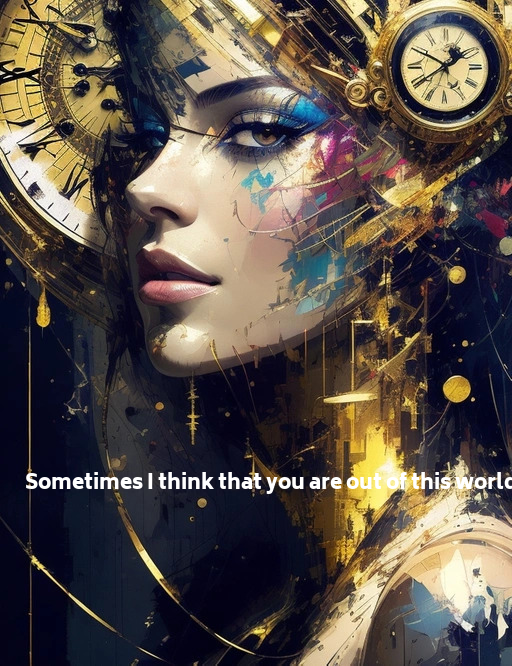

In [5]:
from PIL import Image,ImageFont,ImageDraw
from datetime import datetime
def mkmem(mem_text,FNTdir,IMG):
    writeimg = Image.open(IMG).convert("RGB")
    newimg = Image.new("RGB", writeimg.size)
    newimg.paste(writeimg)
    width_image = newimg.size[0]
    height_image = newimg.size[1]
    
    for font_size in range(50, 0, -1):
        font = ImageFont.truetype(FNTdir+"Biryani-Bold.ttf", font_size)
        if font.getsize(meme_text)[0] <= width_image:
            print (font_size)
            break
    else:
        print ('no fonts fit!')   
    
    
    
    draw = ImageDraw.Draw(newimg)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype(FNTdir+"Biryani-Black.ttf", 20)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((int(0.05*width_image), int(0.7*height_image)),meme_text,(255,255,255),font=font)
    # current dateTime
    now = datetime.now()
    # convert to string
    DIR ="static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S")+".jpg"
    newimg.save(DIR+FileName)
    return newimg
meme_text = "Sometimes I think that you are out of this world, do you know why"
FNTdir = "/home/jack/fonts/"
IMG="/home/jack/Desktop/StoryMaker/static/images/abstract_beauty/Deliberate_11_abstract_beauty_centered_looking_at_the_c_002.jpg"
im = mkmem(meme_text,FNTdir,IMG)    
im

In [6]:
!ls /home/jack/fonts/Biryani-Bold.ttf

/home/jack/fonts/Biryani-Bold.ttf


In [7]:
for font_size in range(50, 0, -1):
    font = ImageFont.truetype("impact.ttf", font_size)
    if font.getsize(meme_text)[0] <= width_image:
        break
else:
    print 'no fonts fit!'


SyntaxError: Missing parentheses in call to 'print'. Did you mean print('no fonts fit!')? (2863743905.py, line 6)

In [8]:
from PIL import Image,ImageFont,ImageDraw
from datetime import datetime

# current dateTime
now = datetime.now()
# convert to string
FileName = now.strftime("%Y-%m-%d_%H:%M:%S")+".jpg"
print(date_time_str)

NameError: name 'date_time_str' is not defined

In [9]:
!ls /home/jack/fonts/

 06f4d00923ea24697df5df0b92984175991d8bd25776a02d531bb401e393ec42.ttf
 223490291528837216424bf892a36810.ttf
 3d06af1f31cd83ace7a265a014b8fb5dee15770ecac8f7a55555190e627e03c2.ttf
 aakar-medium.ttf
 AbyssinicaSIL-Regular.ttf
 academicons.ttf
 Almendra-BoldItalic.ttf
 Almendra-Bold.ttf
 Almendra-Italic.ttf
 Almendra-Regular.ttf
 AlmendraSmallCaps.ttf
 almfixed.ttf
 ani.ttf
 AnjaliOldLipi-Regular.ttf
 AnonymousPro-BoldItalic.ttf
 AnonymousPro-Bold.ttf
 AnonymousPro-Italic.ttf
 AnonymousPro-Regular.ttf
 ArchitectsDaughter-Regular.ttf
 Arimo-BoldItalic.ttf
 Arimo-Bold.ttf
 Arimo-Italic.ttf
 Arimo-Regular.ttf
 BalsamiqSans-Regular.ttf
 Biryani-Black.ttf
 Biryani-Bold.ttf
 Biryani-ExtraBold.ttf
 Biryani-ExtraLight.ttf
 Biryani-Light.ttf
 Biryani-Regular.ttf
 Biryani-SemiBold.ttf
 Bitter-Bold.ttf
 Bitter-Italic.ttf
 Bitter-Regular.ttf
 blex.ttf
 blsy.ttf
 c651b8a67d3193206f622c3c3b0fbca4a2f2727108c4212b52c1e2a2e84c9b31.ttf
 Caladea-BoldItalic.ttf
 Caladea-Bold.ttf
 Caladea-Italic.ttf
 Caladea-R

In [10]:
from PIL import ImageFont, ImageDraw, Image

font = ImageFont.truetype("/home/jack/fonts/DejaVuSans-Bold.ttf", 41)
draw = ImageDraw.Draw(Image.new("RGB", (1, 1)))  # Create a temporary image to create an ImageDraw object
width, height = draw.textsize("pharetra. purus", font=font)

print(width, height)


363 48


In [11]:
from PIL import ImageFont
font = ImageFont.truetype("/home/jack/fonts/DejaVuSans-Bold.ttf", 41)
width, height = font.getsize("pharetra. purus")
print(width, height)
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[11], line 3
      1 from PIL import ImageFont
      2 font = ImageFont.truetype("/home/jack/fonts/DejaVuSans-Bold.ttf", 41)
----> 3 width, height = font.getsize("pharetra. purus")
      4 print(width, height)

AttributeError: 'FreeTypeFont' object has no attribute 'getsize'


SyntaxError: invalid syntax (2244633905.py, line 5)

In [12]:
from PIL import ImageFont

FNTdir = "/home/jack/fonts/"
meme_text = "When friends say you're out of this world"
font_size = 20

text_size = get_text_size(FNTdir + "Biryani-Black.ttf", meme_text, font_size)

font = ImageFont.truetype(fontPath, fontSize)
sz = font.getsize(text)


NameError: name 'get_text_size' is not defined

In [13]:
from PIL import ImageFont

def get_text_size(font_path, text, font_size):
    font = ImageFont.truetype(font_path, font_size)
    text_size = font.getsize(text)
    return text_size

FNTdir = "/home/jack/fonts/"
meme_text = "When friends say you're out of this world"
font_size = 20

text_size = get_text_size(FNTdir + "Biryani-Black.ttf", meme_text, font_size)

print("Text size:", text_size)


Text size: (427, 28)


In [14]:
from PIL import Image,ImageFont,ImageDraw
from datetime import datetime
Image_file ="/home/jack/Desktop/StoryMaker/static/images/abstract_beauty/Deliberate_11_abstract_beauty_centered_looking_at_the_c_002.jpg"
max_frame_int = 1
meme_text = "When friends say your out of this world"
FNTdir = "/home/jack/fonts/"
for font_size in range(50, 0, -1):
    font = ImageFont.truetype(FNTdir+"Biryani-Bold.ttf", font_size)
    if font.getsize(meme_text)[0] <= width_image:
        break
else:
    print ('no fonts fit!')

for i in range(0,max_frame_int + 1):
    writeimg = Image.open(Image_file)
    newimg = Image.new("RGB", writeimg.size)
    newimg.paste(writeimg)
    width_image = newimg.size[0]
    height_image = newimg.size[1]
    draw = ImageDraw.Draw(newimg)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype(FNTdir+"Biryani-Black.ttf", 20)

    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((int(0.05*width_image), int(0.7*height_image)),meme_text,(255,255,255),font=font)
    # current dateTime
    now = datetime.now()
    # convert to string
    DIR ="static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S")+".jpg"
    newimg.save(DIR+FileName)
    newimg
    
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[4], line 9
      7 for font_size in range(50, 0, -1):
      8     font = ImageFont.truetype(FNTdir+"Biryani-Bold.ttf", font_size)
----> 9     if font.getsize(meme_text)[0] <= width_image:
     10         break
     11 else:

AttributeError: 'FreeTypeFont' object has no attribute 'getsize'
    

SyntaxError: invalid syntax (1647653919.py, line 34)

In [15]:
from PIL import Image,ImageFont,ImageDraw
from datetime import datetime

max_frame_int = 1
meme_text = "When friends say your out of this world"
FNTdir = "/home/jack/fonts/"
writeimg = Image.open("/home/jack/Desktop/StoryMaker/static/goddess/1080_2023-07-13-06:231689200625.jpg")
width_image =writeimg.size[1]
for font_size in range(50, 0, -1):
    font = ImageFont.truetype(FNTdir+"Biryani-Bold.ttf", font_size)
    if font.getsize(meme_text)[0] <= width_image:
        break
else:
    print ('no fonts fit!')

def mkmem(mem_text,FNTdir,IMG):
    writeimg = Image.open(IMG)
    newimg = Image.new("RGB", writeimg.size)
    newimg.paste(writeimg)
    width_image = newimg.size[0]
    height_image = newimg.size[1]
    draw = ImageDraw.Draw(newimg)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype(FNTdir+"Biryani-Black.ttf", 20)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((int(0.05*width_image), int(0.7*height_image)),meme_text,(255,255,255),font=font)
    # current dateTime
    now = datetime.now()
    # convert to string
    DIR ="static/MemImages/"
    FileName = now.strftime("%Y-%m-%d_%H:%M:%S")+".jpg"
    newimg.save(DIR+FileName)
    return newimg
meme_text = "When friends say your out of this world"
FNTdir = "/home/jack/fonts/"
IMG="/home/jack/Desktop/StoryMaker/static/goddess/1080_2023-07-13-06:231689200625.jpg"
im = mkmem(meme_text,FNTdir,IMG)    
im

FileNotFoundError: [Errno 2] No such file or directory: '/home/jack/Desktop/StoryMaker/static/goddess/1080_2023-07-13-06:231689200625.jpg'

In [ ]:
!ls DIR+FileName

In [ ]:
import time
file = time.stfmt(%d%f%m)
print (file)

In [16]:
!ls /home/jack/fonts

 06f4d00923ea24697df5df0b92984175991d8bd25776a02d531bb401e393ec42.ttf
 223490291528837216424bf892a36810.ttf
 3d06af1f31cd83ace7a265a014b8fb5dee15770ecac8f7a55555190e627e03c2.ttf
 aakar-medium.ttf
 AbyssinicaSIL-Regular.ttf
 academicons.ttf
 Almendra-BoldItalic.ttf
 Almendra-Bold.ttf
 Almendra-Italic.ttf
 Almendra-Regular.ttf
 AlmendraSmallCaps.ttf
 almfixed.ttf
 ani.ttf
 AnjaliOldLipi-Regular.ttf
 AnonymousPro-BoldItalic.ttf
 AnonymousPro-Bold.ttf
 AnonymousPro-Italic.ttf
 AnonymousPro-Regular.ttf
 ArchitectsDaughter-Regular.ttf
 Arimo-BoldItalic.ttf
 Arimo-Bold.ttf
 Arimo-Italic.ttf
 Arimo-Regular.ttf
 BalsamiqSans-Regular.ttf
 Biryani-Black.ttf
 Biryani-Bold.ttf
 Biryani-ExtraBold.ttf
 Biryani-ExtraLight.ttf
 Biryani-Light.ttf
 Biryani-Regular.ttf
 Biryani-SemiBold.ttf
 Bitter-Bold.ttf
 Bitter-Italic.ttf
 Bitter-Regular.ttf
 blex.ttf
 blsy.ttf
 c651b8a67d3193206f622c3c3b0fbca4a2f2727108c4212b52c1e2a2e84c9b31.ttf
 Caladea-BoldItalic.ttf
 Caladea-Bold.ttf
 Caladea-Italic.ttf
 Caladea-R